In [2]:
import sys
sys.path.append(r'C:\Users\tinc9\Documents\CNRS-offline')
sys.path.append(r'C:\Users\tinc9\Documents\CNRS-offline\quantum_main_project')
import lpfet
import numpy as np
import matplotlib.pyplot as plt
import essentials
import seaborn as sns
import matplotlib.colors as mcolors

import importlib
importlib.reload(lpfet)

<module 'lpfet' from 'C:\\Users\\tinc9\\Documents\\CNRS-offline\\quantum_main_project\\LPFET\\lpfet.py'>

# 6 site ring with 3 pairs of atoms on opposite sites

```
  o -- s
 /      \
x        x   
 \      /
  s -- o
  
```
Potential on sites are +i for o, 0 for s  and -i for x

## tolerance = 1E-6

In [4]:
x = np.arange(0.05, 2.1, 0.2)
name = '_6ring3sites_v1'
mol1 = lpfet.Molecule(6,6, name)
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
first = True
for i in x:
    if not first:
        mol1.clear_object(name)
    first = False
    print(i, i/max(x))
    pmv = i
    t, v_ext, u = lpfet.generate_from_graph(
        {0: {'v': -pmv, 'U': 1}, 1: {'v': 0, 'U': 1}, 2: {'v': pmv, 'U': 1}, 3: {'v': -pmv, 'U': 1},
         4: {'v': 0, 'U': 1}, 5: {'v': pmv, 'U': 1}},
        {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
    mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 4], [2, 5]])
    mol1.self_consistent_loop(num_iter=20, tolerance=0.000001, oscillation_compensation=1)
    
    y.append(mol1.density_progress)
    y_simple.append(mol1.n_ks)
    y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
    y_ab /= 2
    y_ref.append(y_ab.diagonal())
    


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
0.05 0.02439024390243903
Loop 0, Loop 1, -1.3544814706188688->-0.8351011803374886->-1.2612210730223392!=-1.403261037250623
-0.4212968690187199->-0.9281997912106041->-0.5154460817378306!=-0.3778615119135727
Loop 2, -0.8351011803374886->-1.2612210730223392->-1.015272436603015!=-0.9332895577965737
-0.9281997912106041->-0.5154460817378306->-0.7656102237465748!=-0.8489982710828229
Loop 3, Loop 4, -1.015272436603015->-1.1761426676933786->-1.0549482817658151!=-1.0145501531232939
Loop 5, Loop 6, Loop 7, Loop 8, Loop 9, FCI densities (per spin): [0.50876013 0.5        0.49123987 0.50876013 0.5        0.49123987]
0.25 0.12195121951219513
Loop 0, Loop 1, -1.0858714573182306->-0.6199717020424038->-0.9862935094643027!=-1.1084007786049357
-0.11219413880204707->-0.689291679737116->-0.22982537579650358!=-0.07666994114963276
Loop 2, Loop 3, -0.9862935094643027->-0.7246011959177814->-0.9222945387815281!=-0.9881

In [6]:
for i in range(len(y)):
    y[i] = np.array(y[i], dtype=float)
y_ref = np.array(y_ref)
y_simple = np.array(y_simple)

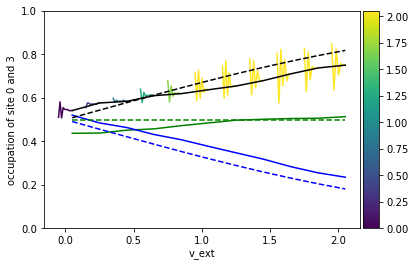

In [11]:
import matplotlib as mpl
colors = plt.cm.viridis(np.linspace(0, max(x), len(x)))
norm = mpl.colors.Normalize(vmin=0, vmax=max(x))
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
for x_i, regime in enumerate(y):
    mu_ext = x[x_i]
    length = len(regime)
    x_data = np.linspace(-0.1, 0, length) + mu_ext
    plt.plot(x_data, regime[:,0], color=colors[x_i])

plt.plot(x, y_simple[:, 0], c='k')
plt.plot(x, y_simple[:, 1], c='g')
plt.plot(x, y_simple[:, 2], c='b')
plt.plot(x, y_ref[:, 0], c='k', linestyle='--')
plt.plot(x, y_ref[:, 1], c='g', linestyle='--')
plt.plot(x, y_ref[:, 2], c='b', linestyle='--')
plt.xlabel("v_ext")
plt.ylabel("occupation of site 0 and 3")
plt.ylim(0,1)
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=mpl.cm.viridis, orientation='vertical', norm=norm)
plt.gcf().add_axes(ax_cb)
plt.show()

## Tolerance=0, num_iter=20

In [14]:
x = np.arange(0.05, 2.1, 0.2)
name = '_6ring3sites_v1'
mol1 = lpfet.Molecule(6,6, name)
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
first = True
for i in x:
    if not first:
        mol1.clear_object(name)
    first = False
    print(i, i/max(x))
    pmv = i
    t, v_ext, u = lpfet.generate_from_graph(
        {0: {'v': -pmv, 'U': 1}, 1: {'v': 0, 'U': 1}, 2: {'v': pmv, 'U': 1}, 3: {'v': -pmv, 'U': 1},
         4: {'v': 0, 'U': 1}, 5: {'v': pmv, 'U': 1}},
        {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
    mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 4], [2, 5]])
    mol1.self_consistent_loop(num_iter=20, tolerance=0.0, oscillation_compensation=1)
    
    y.append(mol1.density_progress)
    y_simple.append(mol1.n_ks)
    y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
    y_ab /= 2
    y_ref.append(y_ab.diagonal())
for i in range(len(y)):
    y[i] = np.array(y[i], dtype=float)
y_ref = np.array(y_ref)
y_simple = np.array(y_simple)   


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
0.05 0.02439024390243903
Loop 0, Loop 1, -1.3544814706188688->-0.8351011803374886->-1.2612210730223392!=-1.403261037250623
-0.4212968690187199->-0.9281997912106041->-0.5154460817378306!=-0.3778615119135727
Loop 2, -0.8351011803374886->-1.2612210730223392->-1.015272436603015!=-0.9332895577965737
-0.9281997912106041->-0.5154460817378306->-0.7656102237465748!=-0.8489982710828229
Loop 3, Loop 4, -1.015272436603015->-1.1761426676933786->-1.0549482817658151!=-1.0145501531232939
Loop 5, Loop 6, Loop 7, Loop 8, Loop 9, Loop 10, Loop 11, Loop 12, Loop 13, Loop 14, Loop 15, Loop 16, Loop 17, Loop 18, Loop 19, FCI densities (per spin): [0.50876013 0.5        0.49123987 0.50876013 0.5        0.49123987]
0.25 0.12195121951219513
Loop 0, Loop 1, -1.0858714573182306->-0.6199717020424038->-0.9862935094643027!=-1.1084007786049357
-0.11219413880204707->-0.689291679737116->-0.22982537579650358!=-0.07666994114963

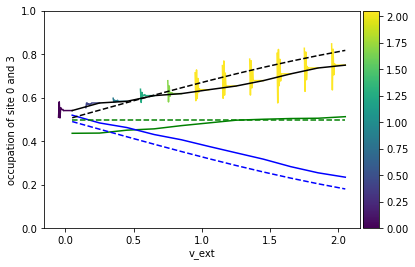

In [15]:
import matplotlib as mpl
colors = plt.cm.viridis(np.linspace(0, max(x), len(x)))
norm = mpl.colors.Normalize(vmin=0, vmax=max(x))
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
for x_i, regime in enumerate(y):
    mu_ext = x[x_i]
    length = len(regime)
    x_data = np.linspace(-0.1, 0, length) + mu_ext
    plt.plot(x_data, regime[:,0], color=colors[x_i])

plt.plot(x, y_simple[:, 0], c='k')
plt.plot(x, y_simple[:, 1], c='g')
plt.plot(x, y_simple[:, 2], c='b')
plt.plot(x, y_ref[:, 0], c='k', linestyle='--')
plt.plot(x, y_ref[:, 1], c='g', linestyle='--')
plt.plot(x, y_ref[:, 2], c='b', linestyle='--')
plt.xlabel("v_ext")
plt.ylabel("occupation of site 0 and 3")
plt.ylim(0,1)
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=mpl.cm.viridis, orientation='vertical', norm=norm)
plt.gcf().add_axes(ax_cb)
plt.show()

## shifting v_ext for 1.5 up

In [18]:
x = np.arange(0.05, 2.1, 0.2)
shift_potential = 1.5
name = '_6ring3sites_v1'
mol1 = lpfet.Molecule(6,6, name)
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
first = True
for i in x:
    if not first:
        mol1.clear_object(name)
    first = False
    print(i, i/max(x))
    pmv = i
    t, v_ext, u = lpfet.generate_from_graph(
        {0: {'v': -pmv + shift_potential, 'U': 1}, 1: {'v': 0 + shift_potential, 'U': 1}, 2: {'v': pmv + shift_potential, 'U': 1}, 3: {'v': -pmv + shift_potential, 'U': 1},
         4: {'v': 0 + shift_potential, 'U': 1}, 5: {'v': pmv + shift_potential, 'U': 1}},
        {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
    mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 4], [2, 5]])
    mol1.self_consistent_loop(num_iter=20, tolerance=1e-6, oscillation_compensation=1)
    
    y.append(mol1.density_progress)
    y_simple.append(mol1.n_ks)
    y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
    y_ab /= 2
    y_ref.append(y_ab.diagonal())
for i in range(len(y)):
    y[i] = np.array(y[i], dtype=float)
y_ref = np.array(y_ref)
y_simple = np.array(y_simple)   


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
0.05 0.02439024390243903
Loop 0, Loop 1, -1.3544814620987196->-0.8351012144274876->-1.2612211111467264!=-1.4032610767198062
-0.4212968578669373->-0.9281998045557337->-0.5154461027760457!=-0.37786153551614976
Loop 2, -0.8351012144274876->-1.2612211111467264->-1.0152723990041053!=-0.933289494956565
-0.9281998045557337->-0.5154461027760457->-0.765610245171183!=-0.8489982926362288
Loop 3, Loop 4, -1.0152723990041053->-1.1761426887548978->-1.0549483063208036!=-1.0145501788427722
Loop 5, Loop 6, Loop 7, Loop 8, Loop 9, FCI densities (per spin): [0.50876013 0.5        0.49123987 0.50876013 0.5        0.49123987]
0.25 0.12195121951219513
Loop 0, Loop 1, -1.085871395998528->-0.6199718701780671->-0.9862933866014856!=-1.108400558742625
-0.11219413060549775->-0.6892916346136457->-0.22982545957692319!=-0.0766700678980157
Loop 2, Loop 3, -0.9862933866014856->-0.7246012977222709->-0.9222944670253893!=-0.9881

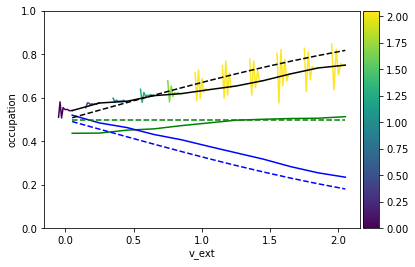

In [25]:
import matplotlib as mpl
colors = plt.cm.viridis(np.linspace(0, max(x), len(x)))
norm = mpl.colors.Normalize(vmin=0, vmax=max(x))
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
for x_i, regime in enumerate(y):
    mu_ext = x[x_i]
    length = len(regime)
    x_data = np.linspace(-0.1, 0, length) + mu_ext
    plt.plot(x_data, regime[:,0], color=colors[x_i])

plt.plot(x, y_simple[:, 0], c='k', label='0, 3')
plt.plot(x, y_simple[:, 1], c='g', label='1, 4')
plt.plot(x, y_simple[:, 2], c='b', label='2, 5')
plt.plot(x, y_ref[:, 0], c='k', linestyle='--', label='0, 3, ref')
plt.plot(x, y_ref[:, 1], c='g', linestyle='--', label='1, 4, ref')
plt.plot(x, y_ref[:, 2], c='b', linestyle='--', label='2, 5, ref')
plt.xlabel("v_ext")
# plt.xlim(-.6, 2.1)
plt.ylabel("occupation")
# plt.legend()
plt.ylim(0,1)
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=mpl.cm.viridis, orientation='vertical', norm=norm)
plt.gcf().add_axes(ax_cb)
plt.show()